In [1]:
# ------------------------------------------------------------------
# Step 0 – Imports, File Paths, and Script Path Setup (CT)
# ------------------------------------------------------------------
import os
import sys
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

# Add the 'scripts' folder to Python import path
script_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# File locations
data_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/data/raw"

gpkg_path = os.path.join(data_dir, "LSOA_5-year_segment_master.gpkg")
travel_csv_path = os.path.join(data_dir, "LSOA_to_LSOA.csv")
modality_counts_path = os.path.join(data_dir, "modality_procedure_counts_by_age_band_2024.csv")
cdc_path = os.path.join(data_dir, "health_infra/NHS_SW_ Community_Diagnostic_Centres_enriched.csv")
acute_path = os.path.join(data_dir, "health_infra/NHS_SW_Acute_Hospitals_enriched.csv")

# Confirm file existence
for path in [gpkg_path, travel_csv_path, modality_counts_path, cdc_path, acute_path]:
    assert os.path.exists(path), f"Missing file: {path}"

# Utility function to check columns
def print_columns(filepath, is_geopkg=False):
    print(f"\nColumns in: {os.path.basename(filepath)}")
    try:
        if is_geopkg:
            df = gpd.read_file(filepath)
        else:
            df = pd.read_csv(filepath, nrows=5)  # Just preview first few rows for speed
        print(df.columns.tolist())
    except Exception as e:
        print(f"Could not read: {e}")

# Run checks
print_columns(gpkg_path, is_geopkg=True)
print_columns(travel_csv_path)
print_columns(modality_counts_path)
print_columns(cdc_path)
print_columns(acute_path)



Columns in: LSOA_5-year_segment_master.gpkg
['ICB23NM', 'ladnm', 'ladcd', 'msoa21nm', 'msoa21cd', 'lsoa21nmw', 'lsoa21cd', 'total_population', 'age_0_4', 'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_64', 'age_65_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85_plus', 'lat', 'long', 'bng_e', 'bng_n', 'lsoa21nm', 'geometry']

Columns in: LSOA_to_LSOA.csv
['E01022150', 'E01014950', '42.7481676448875', '56.2881676448875', '56.2881676448875.1']

Columns in: modality_procedure_counts_by_age_band_2024.csv
['age_band', 'CT_Cancer Pathway', 'CT_Non-Cancer Pathway', 'CT_Total', 'Endoscopy_Cancer Pathway', 'Endoscopy_Non-Cancer Pathway', 'Endoscopy_Total', 'MRI_Cancer Pathway', 'MRI_Non-Cancer Pathway', 'MRI_Total']

Columns in: NHS_SW_ Community_Diagnostic_Centres_enriched.csv
['Code', 'Name', 'Address 1', 'Address 2', 'Address 3', 'Address 4', 'Address 5', 'Postcode', 'Type', 'Parent Orga

In [2]:
# ------------------------------------------------------------------
# Step 1 – Load Emergency and Elective MRI Demand Estimates
# ------------------------------------------------------------------

from estimate_mri_emergency_demand_from_gpkg import estimate_mri_emergency_demand_from_gpkg
from estimate_mri_elective_demand_from_gpkg import estimate_mri_elective_demand_from_gpkg

# Load emergency demand
mri_emergency_demand_df = estimate_mri_emergency_demand_from_gpkg()
print("Loaded Emergency MRI demand per LSOA:")
display(mri_emergency_demand_df.head())

# Load elective demand
mri_elective_demand_df = estimate_mri_elective_demand_from_gpkg()
print("Loaded Elective MRI demand per LSOA:")
display(mri_elective_demand_df.head())


Loaded Emergency MRI demand per LSOA:


,lsoa21cd,mri_emergency_total_demand,mri_emergency_age_0_4,mri_emergency_age_5_9,mri_emergency_age_10_14,mri_emergency_age_15_19,mri_emergency_age_20_24,mri_emergency_age_25_29,mri_emergency_age_30_34,mri_emergency_age_35_39,mri_emergency_age_40_44,mri_emergency_age_45_49,mri_emergency_age_50_54,mri_emergency_age_55_59,mri_emergency_age_60_64,mri_emergency_age_65_69,mri_emergency_age_70_74,mri_emergency_age_75_79,mri_emergency_age_80_84,mri_emergency_age_85_plus
0,E01020484,15.101581,0.169763,0.122050,0.212913,0.287176,0.238074,0.231259,0.466657,0.566777,0.509414,0.655062,0.967087,1.177056,1.633801,1.438632,1.637949,1.909876,1.619227,1.258807
1,E01020481,16.581984,0.153974,0.056601,0.115080,0.103536,0.199697,0.241561,0.351738,0.344658,0.412394,0.444474,0.614644,1.219090,2.081808,1.812190,2.325351,2.514270,1.567126,2.023793
2,E01020482,16.357172,0.272373,0.134445,0.210029,0.156961,0.253432,0.390599,0.689916,0.620444,0.711558,0.686252,0.822486,1.334761,1.949996,1.411037,1.901240,2.248422,1.279674,1.283546
3,E01020479,16.124074,0.130270,0.056601,0.092064,0.153613,0.126716,0.184997,0.243465,0.214442,0.234484,0.389911,0.451923,0.798750,1.014619,1.438632,1.535623,2.852816,2.428969,3.776178
4,E01020478,12.621245,0.146060,0.077826,0.146749,0.193682,0.180490,0.164442,0.270516,0.375292,0.452839,0.428917,0.732154,1.082454,1.199001,1.217325,1.360143,1.982337,1.253496,1.357522


Loaded Elective MRI demand per LSOA:


,lsoa21cd,mri_elective_total_demand,mri_elective_age_0_4,mri_elective_age_5_9,mri_elective_age_10_14,mri_elective_age_15_19,mri_elective_age_20_24,mri_elective_age_25_29,mri_elective_age_30_34,mri_elective_age_35_39,mri_elective_age_40_44,mri_elective_age_45_49,mri_elective_age_50_54,mri_elective_age_55_59,mri_elective_age_60_64,mri_elective_age_65_69,mri_elective_age_70_74,mri_elective_age_75_79,mri_elective_age_80_84,mri_elective_age_85_plus
0,E01020484,71.510405,0.249422,0.554854,1.264113,2.158459,1.534751,1.498259,2.839876,3.686833,3.476077,4.365725,6.096107,7.344611,9.154409,7.862904,7.276307,6.741027,3.902153,1.504519
1,E01020481,73.406386,0.226224,0.257314,0.683259,0.778190,1.287352,1.565008,2.140524,2.241966,2.814045,2.962238,3.874454,7.606895,11.664653,9.904599,10.329968,8.874274,3.776596,2.418826
2,E01020482,78.417226,0.400181,0.611201,1.246990,1.179741,1.633759,2.530581,4.198534,4.035931,4.855447,4.573593,5.184602,8.328661,10.926090,7.712080,8.445930,7.935947,3.083870,1.534088
3,E01020479,59.878987,0.191398,0.257314,0.546607,1.154582,0.816880,1.198542,1.481622,1.394925,1.600047,2.598597,2.848732,4.984050,5.685049,7.862904,6.821737,10.069194,5.853539,4.513267
4,E01020478,57.583682,0.214596,0.353807,0.871281,1.455745,1.163530,1.065370,1.646246,2.441241,3.090027,2.858559,4.615192,6.754310,6.718167,6.653340,6.042201,6.996782,3.020782,1.622503


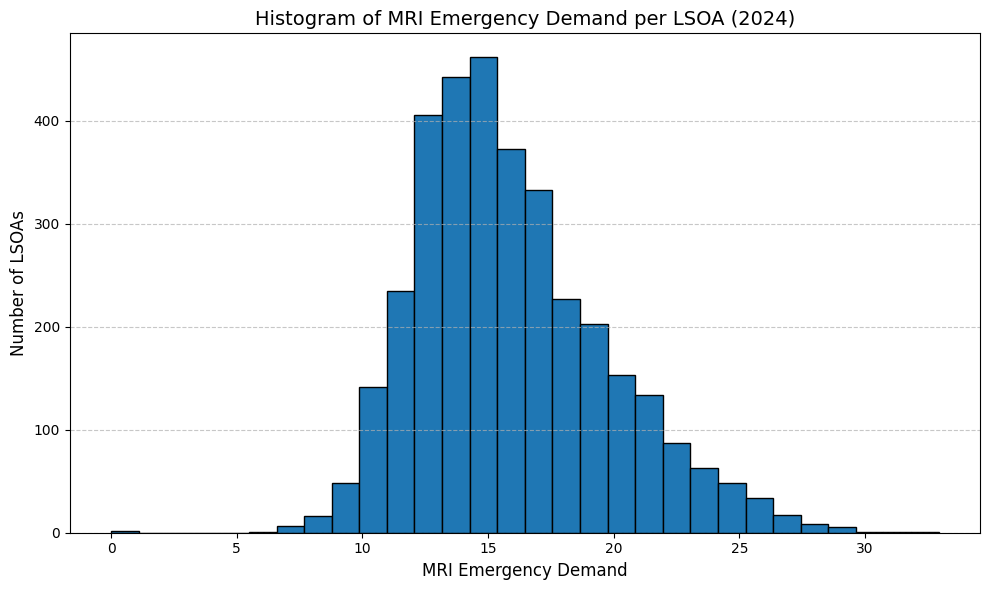

In [3]:
# ------------------------------------------------------------------
# Step 1a – Histogram of MRI Emergency Demand per LSOA
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(mri_emergency_demand_df["mri_emergency_total_demand"], bins=30, edgecolor='black')

plt.title("Histogram of MRI Emergency Demand per LSOA (2024)", fontsize=14)
plt.xlabel("MRI Emergency Demand", fontsize=12)
plt.ylabel("Number of LSOAs", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


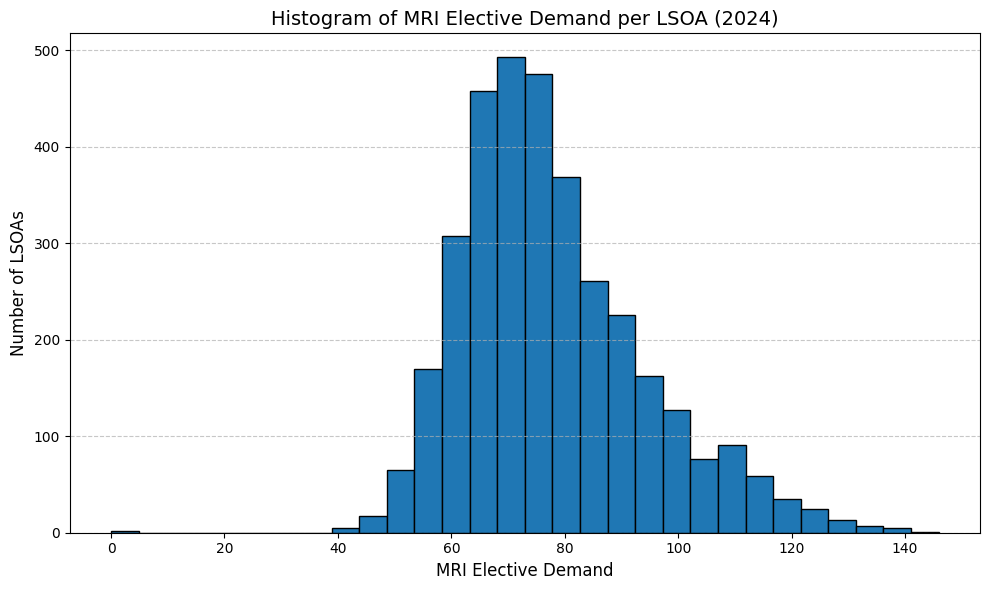

In [4]:
# ------------------------------------------------------------------
# Step 1b – Histogram of MRI Elective Demand per LSOA
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(mri_elective_demand_df["mri_elective_total_demand"], bins=30, edgecolor='black')

plt.title("Histogram of MRI Elective Demand per LSOA (2024)", fontsize=14)
plt.xlabel("MRI Elective Demand", fontsize=12)
plt.ylabel("Number of LSOAs", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


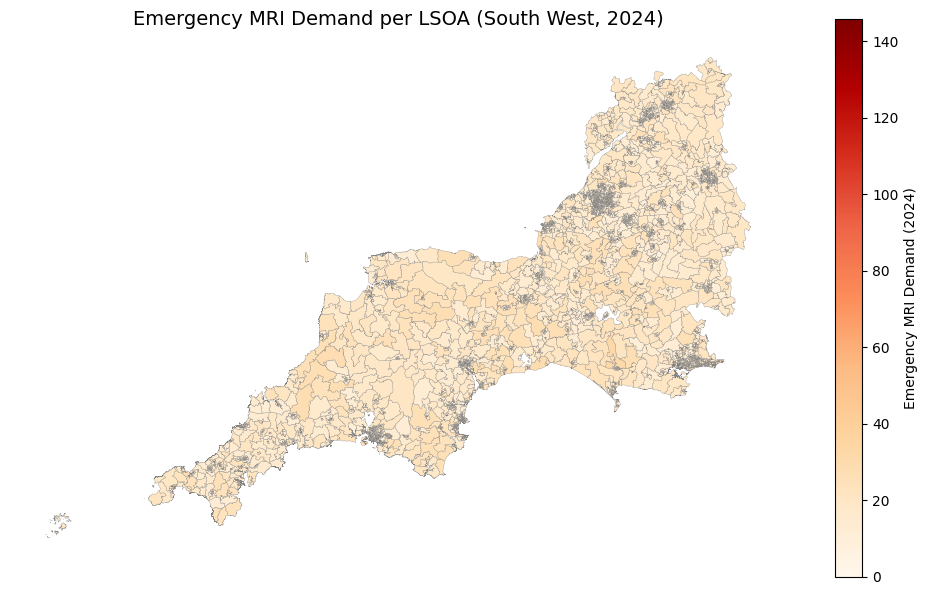

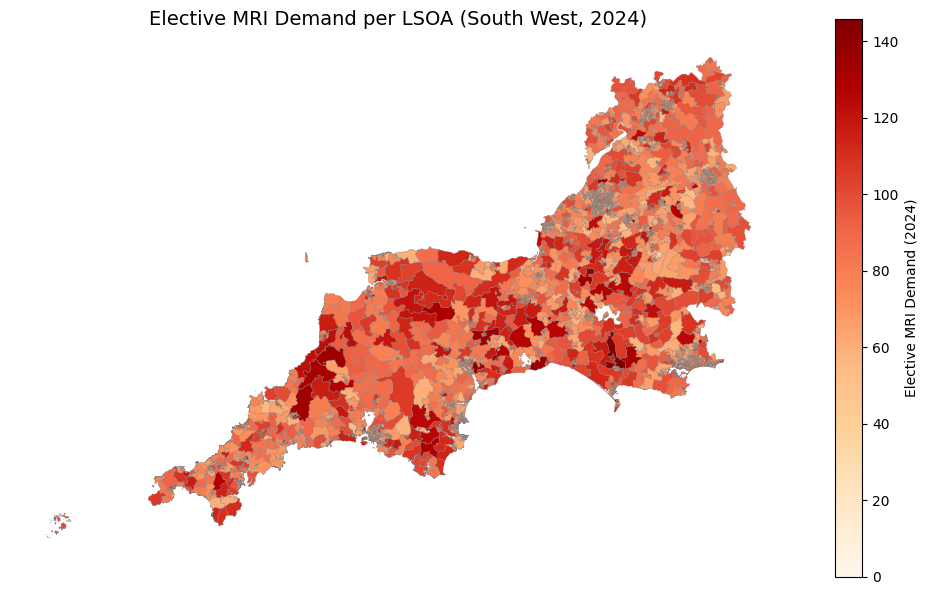

In [5]:
# ------------------------------------------------------------------
# Step 2 – Plot Emergency and Elective MRI Demand (Same Scale)
# ------------------------------------------------------------------

import geopandas as gpd
import matplotlib.pyplot as plt

# Load base geometry
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)

# Merge emergency demand
gdf_emergency = gdf_geom.merge(
    mri_emergency_demand_df[["lsoa21cd", "mri_emergency_total_demand"]],
    on="lsoa21cd", how="left"
)

# Merge elective demand
gdf_elective = gdf_geom.merge(
    mri_elective_demand_df[["lsoa21cd", "mri_elective_total_demand"]],
    on="lsoa21cd", how="left"
)

# Determine shared maximum for consistent choropleth scaling
max_val = max(
    gdf_emergency["mri_emergency_total_demand"].max(),
    gdf_elective["mri_elective_total_demand"].max()
)

# Plot emergency MRI demand
fig, ax = plt.subplots(figsize=(10, 6))
gdf_emergency.plot(
    column="mri_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Emergency MRI Demand (2024)"},
    ax=ax,
    vmin=0,
    vmax=max_val
)
ax.set_title("Emergency MRI Demand per LSOA (South West, 2024)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("mri_emergency_demand_choropleth_2024.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot elective MRI demand
fig, ax = plt.subplots(figsize=(10, 6))
gdf_elective.plot(
    column="mri_elective_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Elective MRI Demand (2024)"},
    ax=ax,
    vmin=0,
    vmax=max_val
)
ax.set_title("Elective MRI Demand per LSOA (South West, 2024)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.savefig("mri_elective_demand_choropleth_2024.png", dpi=300, bbox_inches="tight")
plt.show()


In [6]:
# ------------------------------------------------------------------
# Step 3 – Compute Nearest Acute Hospital for Emergency MRI Access
# ------------------------------------------------------------------

# --- 3.1 Load LSOA-to-LSOA Travel Matrix ---
travel_df = pd.read_csv(travel_csv_path, header=None)
travel_df.columns = [
    "origin_lsoa", "dest_lsoa", "car_travel_minutes",
    "placeholder_1", "placeholder_2"
]
travel_df["car_travel_minutes"] = pd.to_numeric(travel_df["car_travel_minutes"], errors="coerce")
travel_df["origin_lsoa"] = travel_df["origin_lsoa"].astype(str)
travel_df["dest_lsoa"] = travel_df["dest_lsoa"].astype(str)

# --- 3.2 Load Acute Sites and Clean ---
acute_df = pd.read_csv(acute_path)
acute_sites = (
    acute_df[["Name", "lsoa21cd"]]
    .dropna()
    .drop_duplicates()
    .assign(site_type="Acute")
)
acute_sites["lsoa21cd"] = acute_sites["lsoa21cd"].astype(str)

# --- 3.3 Identify Nearest Acute Site for Each LSOA ---
nearest_acute = (
    travel_df.merge(acute_sites, left_on="dest_lsoa", right_on="lsoa21cd", how="inner")
    .sort_values("car_travel_minutes")
    .groupby("origin_lsoa", as_index=False)
    .first()
    .rename(columns={
        "origin_lsoa": "lsoa21cd",
        "Name": "nearest_acute_site",
        "car_travel_minutes": "travel_to_acute_mins"
    })[["lsoa21cd", "nearest_acute_site", "travel_to_acute_mins"]]
)

# --- 3.4 Load LSOA Geometry ---
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
mri_emergency_demand_df["lsoa21cd"] = mri_emergency_demand_df["lsoa21cd"].astype(str)

# --- 3.5 Merge Geometry with Emergency MRI Demand ---
gdf_mri_emergency = gdf_geom.merge(
    mri_emergency_demand_df[["lsoa21cd", "mri_emergency_total_demand"]],
    on="lsoa21cd",
    how="left"
)

# --- 3.6 Merge with Nearest Acute Travel Time ---
gdf_mri_emergency = gdf_mri_emergency.loc[:, ~gdf_mri_emergency.columns.duplicated()]
nearest_acute = nearest_acute.loc[:, ~nearest_acute.columns.duplicated()]
nearest_acute["lsoa21cd"] = nearest_acute["lsoa21cd"].astype(str)

gdf_mri_emergency = gdf_mri_emergency.merge(nearest_acute, on="lsoa21cd", how="left")

# --- 3.7 Flag if Facility Is Onsite ---
facility_lsoas = set(acute_sites["lsoa21cd"])
gdf_mri_emergency["facility_onsite"] = gdf_mri_emergency["lsoa21cd"].isin(facility_lsoas)

# --- 3.8 Preview Output ---
gdf_mri_emergency[[
    "lsoa21cd", "mri_emergency_total_demand",
    "nearest_acute_site", "travel_to_acute_mins",
    "facility_onsite"
]].head()


,lsoa21cd,mri_emergency_total_demand,nearest_acute_site,travel_to_acute_mins,facility_onsite
0,E01020484,15.101581,Dorset County Hospital,50.094037,False
1,E01020481,16.581984,Dorset County Hospital,53.129856,False
2,E01020482,16.357172,Dorset County Hospital,50.757093,False
3,E01020479,16.124074,Dorset County Hospital,51.415206,False
4,E01020478,12.621245,Dorset County Hospital,49.825037,False


In [7]:
# ------------------------------------------------------------------
# Step 4 – Compute Nearest CDC for Elective MRI Access
# ------------------------------------------------------------------

# --- 4.1 Load CDC Sites and Clean ---
cdc_df = pd.read_csv(cdc_path)
cdc_sites = (
    cdc_df[["Name", "lsoa21cd"]]
    .dropna()
    .drop_duplicates()
    .assign(site_type="CDC")
)
cdc_sites["lsoa21cd"] = cdc_sites["lsoa21cd"].astype(str)

# --- 4.2 Identify Nearest CDC Site for Each LSOA ---
nearest_cdc = (
    travel_df.merge(cdc_sites, left_on="dest_lsoa", right_on="lsoa21cd", how="inner")
    .sort_values("car_travel_minutes")
    .groupby("origin_lsoa", as_index=False)
    .first()
    .rename(columns={
        "origin_lsoa": "lsoa21cd",
        "Name": "nearest_cdc_site",
        "car_travel_minutes": "travel_to_cdc_mins"
    })[["lsoa21cd", "nearest_cdc_site", "travel_to_cdc_mins"]]
)

# --- 4.3 Load Geometry and Elective MRI Demand ---
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
mri_elective_demand_df["lsoa21cd"] = mri_elective_demand_df["lsoa21cd"].astype(str)

gdf_mri_elective = gdf_geom.merge(
    mri_elective_demand_df[["lsoa21cd", "mri_elective_total_demand"]],
    on="lsoa21cd",
    how="left"
)

# --- 4.4 Merge with Nearest CDC Info ---
nearest_cdc = nearest_cdc.loc[:, ~nearest_cdc.columns.duplicated()]
nearest_cdc["lsoa21cd"] = nearest_cdc["lsoa21cd"].astype(str)

gdf_mri_elective = gdf_mri_elective.merge(nearest_cdc, on="lsoa21cd", how="left")

# --- 4.5 Flag if CDC Facility Is Onsite ---
facility_lsoas_cdc = set(cdc_sites["lsoa21cd"])
gdf_mri_elective["cdc_onsite"] = gdf_mri_elective["lsoa21cd"].isin(facility_lsoas_cdc)

# --- 4.6 Preview Output ---
gdf_mri_elective[[
    "lsoa21cd", "mri_elective_total_demand",
    "nearest_cdc_site", "travel_to_cdc_mins",
    "cdc_onsite"
]].head()


,lsoa21cd,mri_elective_total_demand,nearest_cdc_site,travel_to_cdc_mins,cdc_onsite
0,E01020484,71.510405,Dorset Health Village Poole Beales CDC,37.262783,False
1,E01020481,73.406386,Dorset Health Village Poole Beales CDC,40.298602,False
2,E01020482,78.417226,Dorset Health Village Poole Beales CDC,37.925839,False
3,E01020479,59.878987,Dorset Health Village Poole Beales CDC,38.583952,False
4,E01020478,57.583682,Dorset Health Village Poole Beales CDC,36.993783,False


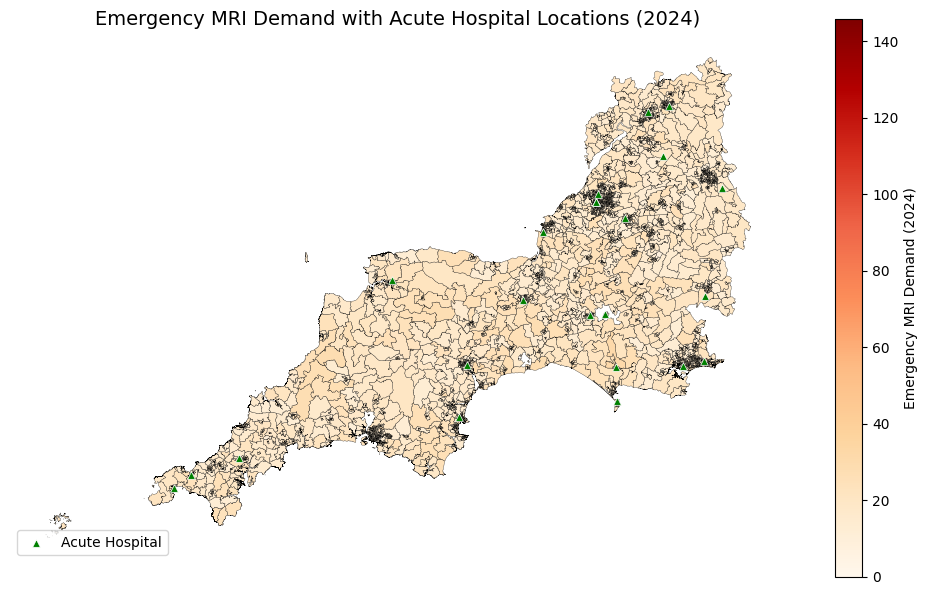

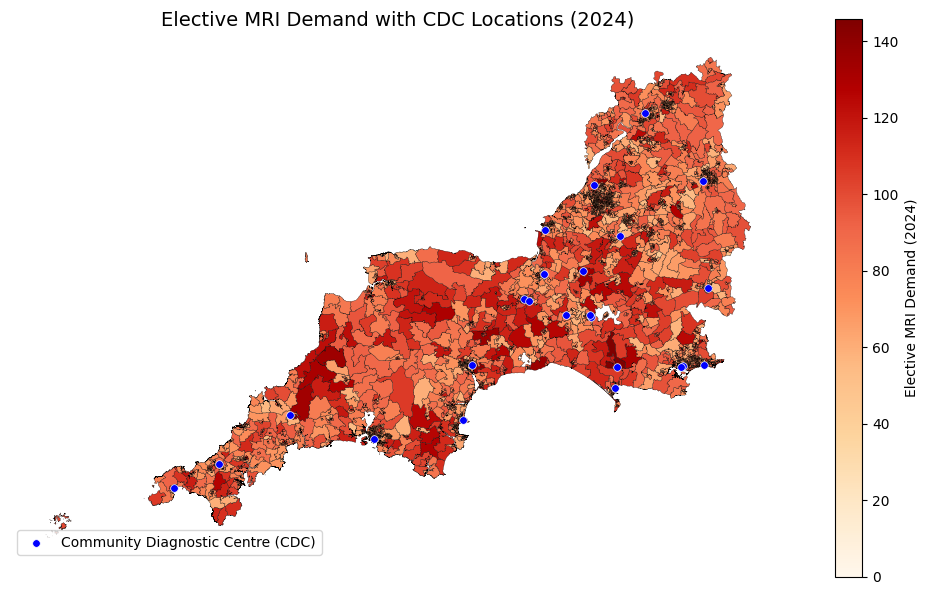

In [10]:
# ------------------------------------------------------------------
# Step 5 – Split Maps: Emergency and Elective MRI Demand (2024)
# ------------------------------------------------------------------

import geopandas as gpd
import matplotlib.pyplot as plt

# --- 5.1: Load and Prepare Geometry + Demand ---
gdf_geom = gpd.read_file(gpkg_path)[["lsoa21cd", "geometry"]]
gdf_geom["lsoa21cd"] = gdf_geom["lsoa21cd"].astype(str)
mri_emergency_demand_df["lsoa21cd"] = mri_emergency_demand_df["lsoa21cd"].astype(str)
mri_elective_demand_df["lsoa21cd"] = mri_elective_demand_df["lsoa21cd"].astype(str)

# Merge emergency demand
gdf_emergency = gdf_geom.merge(
    mri_emergency_demand_df[["lsoa21cd", "mri_emergency_total_demand"]],
    on="lsoa21cd", how="left"
)

# Merge elective demand
gdf_elective = gdf_geom.merge(
    mri_elective_demand_df[["lsoa21cd", "mri_elective_total_demand"]],
    on="lsoa21cd", how="left"
)

# --- 5.2: Compute Shared Max for Colour Scale ---
max_val = max(
    gdf_emergency["mri_emergency_total_demand"].max(),
    gdf_elective["mri_elective_total_demand"].max()
)

# --- 5.3: Prepare Facility Geometry ---
facilities_df = pd.concat([
    cdc_df.assign(site_type="CDC"),
    acute_df.assign(site_type="Acute")
], ignore_index=True).dropna(subset=["lsoa21cd"]).drop_duplicates()

facilities_df["lsoa21cd"] = facilities_df["lsoa21cd"].astype(str)

facilities_gdf = facilities_df.merge(gdf_geom, on="lsoa21cd", how="left")
facilities_gdf = gpd.GeoDataFrame(facilities_gdf, geometry="geometry", crs=gdf_geom.crs)
facilities_gdf["centroid"] = facilities_gdf.geometry.centroid
facilities_gdf = facilities_gdf.set_geometry("centroid")

acute_gdf = facilities_gdf[facilities_gdf["site_type"] == "Acute"]
cdc_gdf = facilities_gdf[facilities_gdf["site_type"] == "CDC"]

# --- 5.4: Plot Emergency MRI Demand with Acute Sites ---
fig1, ax1 = plt.subplots(figsize=(10, 6))
gdf_emergency.plot(
    column="mri_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Emergency MRI Demand (2024)"},
    ax=ax1,
    vmin=0,
    vmax=max_val
)
acute_gdf.plot(
    ax=ax1,
    color="green",
    marker="^",
    markersize=30,
    edgecolor="white",
    linewidth=0.5,
    label="Acute Hospital"
)
ax1.set_title("Emergency MRI Demand with Acute Hospital Locations (2024)", fontsize=14)
ax1.axis("off")
ax1.legend(loc="lower left")
plt.tight_layout()
plt.savefig("mri_emergency_demand_with_acute_2024.png", dpi=300, bbox_inches="tight")
plt.show()

# --- 5.5: Plot Elective MRI Demand with CDC Sites ---
fig2, ax2 = plt.subplots(figsize=(10, 6))
gdf_elective.plot(
    column="mri_elective_total_demand",
    cmap="OrRd",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Elective MRI Demand (2024)"},
    ax=ax2,
    vmin=0,
    vmax=max_val
)
cdc_gdf.plot(
    ax=ax2,
    color="blue",
    marker="o",
    markersize=30,
    edgecolor="white",
    linewidth=0.5,
    label="Community Diagnostic Centre (CDC)"
)
ax2.set_title("Elective MRI Demand with CDC Locations (2024)", fontsize=14)
ax2.axis("off")
ax2.legend(loc="lower left")
plt.tight_layout()
plt.savefig("mri_elective_demand_with_cdcs_2024.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# ------------------------------------------------------------------
# Step 6 – Plot MRI Demand with Catchment Areas (2024)
# ------------------------------------------------------------------

# Prepare Acute Catchments (Emergency MRI)
catchment_acute_mri = gdf_mri_emergency.dissolve(by="nearest_acute_site", as_index=False)
catchment_acute_mri["site_type"] = "Acute"

# Prepare CDC Catchments (Elective MRI)
catchment_cdc_mri = gdf_mri_elective.dissolve(by="nearest_cdc_site", as_index=False)
catchment_cdc_mri["site_type"] = "CDC"

# Combine facility metadata with geometry
facilities_df = pd.concat([
    cdc_df.assign(site_type="CDC"),
    acute_df.assign(site_type="Acute")
], ignore_index=True).dropna(subset=["lsoa21cd"]).drop_duplicates()

facilities_df["lsoa21cd"] = facilities_df["lsoa21cd"].astype(str)
facilities_gdf = facilities_df.merge(gdf_geom, on="lsoa21cd", how="left")
facilities_gdf = gpd.GeoDataFrame(facilities_gdf, geometry="geometry", crs=gdf_geom.crs)
facilities_gdf["centroid"] = facilities_gdf.geometry.centroid
facilities_gdf = facilities_gdf.set_geometry("centroid")

acute_gdf = facilities_gdf[facilities_gdf["site_type"] == "Acute"]
cdc_gdf = facilities_gdf[facilities_gdf["site_type"] == "CDC"]




In [ ]:
# ------------------------------------------------------------------
# Set Shared Colour Scale for MRI Catchment Plots
# ------------------------------------------------------------------

# Compute shared max value
max_val = max(
    gdf_mri_emergency["mri_emergency_total_demand"].max(),
    gdf_mri_elective["mri_elective_total_demand"].max()
)

# --- Emergency MRI Demand with Acute Catchments ---
fig, ax1 = plt.subplots(figsize=(11, 7))

gdf_mri_emergency.plot(
    column="mri_emergency_total_demand",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Emergency MRI Demand (2024)"},
    ax=ax1,
    alpha=0.9,
    vmin=0,
    vmax=max_val
)

catchment_acute_mri.plot(
    ax=ax1,
    facecolor="none",
    edgecolor="black",
    linewidth=1.2,
    linestyle="--",
    label="Acute Catchment"
)

acute_gdf.plot(
    ax=ax1,
    color="green",
    marker="^",
    markersize=40,
    edgecolor="white",
    label="Acute Hospital"
)

ax1.set_title("Emergency MRI Demand with Acute Catchment Areas (2024)", fontsize=14)
ax1.axis("off")
ax1.legend(loc="lower left", frameon=True)
plt.tight_layout()
plt.savefig("mri_emergency_demand_with_acute_catchments_2024.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Elective MRI Demand with CDC Catchments ---
fig, ax2 = plt.subplots(figsize=(11, 7))

gdf_mri_elective.plot(
    column="mri_elective_total_demand",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="grey",
    legend=True,
    legend_kwds={'label': "Elective MRI Demand (2024)"},
    ax=ax2,
    alpha=0.9,
    vmin=0,
    vmax=max_val
)

catchment_cdc_mri.plot(
    ax=ax2,
    facecolor="none",
    edgecolor="black",
    linewidth=1.2,
    linestyle="-",
    label="CDC Catchment"
)

cdc_gdf.plot(
    ax=ax2,
    color="blue",
    marker="o",
    markersize=40,
    edgecolor="white",
    label="CDC"
)

ax2.set_title("Elective MRI Demand with CDC Catchment Areas (2024)", fontsize=14)
ax2.axis("off")
ax2.legend(loc="lower left", frameon=True)
plt.tight_layout()
plt.savefig("mri_elective_demand_with_cdc_catchments_2024.png", dpi=300, bbox_inches="tight")
plt.show()
